In [81]:
# Import dependencies
from bs4 import BeautifulSoup
import requests

from splinter import Browser
import pandas as pd

In [82]:
executable_path = {'executable_path': 'chromedriver.exe'}
browser = Browser('chrome', **executable_path, headless=False)

# Collect the NASA Mars News

'<!DOCTYPE html><html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml" class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" style="--vh:529px;"><head><script src="https://js-agent.newrelic.com/nr-1158.min.js"></script><script type="text/javascript" src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;callback=_ate.cbs.rcb_3w660"></script><script type="text/javascript" src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;jsonp=_ate.cbs.rcb_95980"></script><script type="text/javascript" src="//graph.facebook.com/?id=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;fields=og_object%7Bengagement%7D&amp;callback=_ate.cbs.rcb_5cly0"></script><script type="text/javascript" src="//api-public.addthis.com/url/shares.json?url=https%3A%2F%2
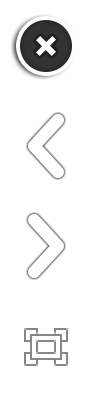
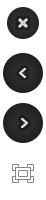
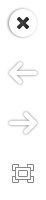
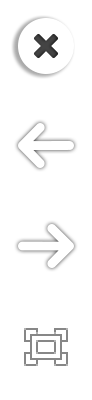
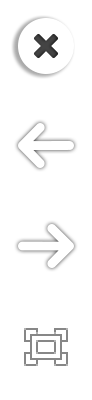
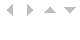

In [83]:
# URL of page to be scraped
url = 'https://mars.nasa.gov/news/'
browser.visit(url)
html = browser.html
html

In [84]:
# Retrieve page with the requests module
response = requests.get(url)
response

<Response [200]>

<!DOCTYPE html>
<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports no-hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="--vh:529px;" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="https://js-agent.newrelic.com/nr-1158.min.js">
  </script>
  <script src="//api-public.addthis.com/url/shares.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;callback=_ate.cbs.rcb_3w660" type="text/javascript">
  </script>
  <script src="//www.reddit.com/api/info.json?url=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;jsonp=_ate.cbs.rcb_95980" type="text/javascript">
  </script>
  <script src="//graph.facebook.com/?id=http%3A%2F%2Fmars.nasa.gov%2Fnews%2F&amp;fields=og_object%7Bengagement%7D&amp;callback=_ate.cbs.rcb_5cly0" type="text/javascript">
  </script>
  <script src="//api-public.addthis.com/url/shares.json?url=https%3
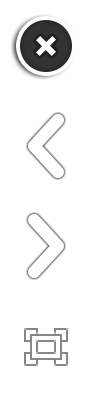
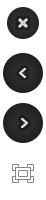
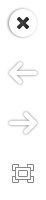
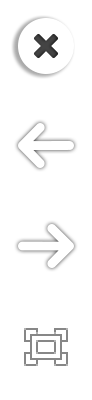
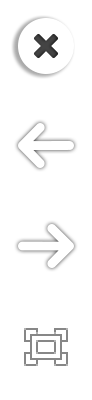
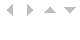

In [85]:
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(html, 'html.parser')
# Examine the results, then determine element that contains sought info
print(soup.prettify())

In [86]:
# grab the title
title = soup.find('div', class_="content_title").a.text
# grab the paragraph
paragraph = soup.find('div', class_="article_teaser_body").text

print(title)
print(paragraph)

Space History Is Made in This NASA Robot Factory
From rockets to rovers, JPL's Spacecraft Assembly Facility has been at the center of robotic spaceflight. Here's a closer look at what makes it so special.


# JPL Mars Space Images - Featured Image

In [87]:
# Use splinter to navigate the site and find the image url for the current Featured Mars Image and assign the url string to a variable called featured_image_url.
url = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(url)
html = browser.html
html

'<!DOCTYPE html><!--[if IE 9]> <html class="no-js ie ie9" lang="en"> <![endif]--><!--[if IE 8]> <html class="no-js ie ie8" lang="en"> <![endif]--><html xmlns="http://www.w3.org/1999/xhtml" style="" class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-"><!-- START HEADER: "DEFAULT" --><!-- Google Tag Manager --><head><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script type="text/javascript" src="https://m.addthis.com/live/red_lojson/300lo.json?si=5e017993374ad143&amp;bkl=0&amp;bl=1&amp;pdt=46900&amp;sid=5e017993374ad143&amp;pu

In [88]:
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(html, 'html.parser')
# Examine the results, then determine element that contains sought info
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 9]> <html class="no-js ie ie9" lang="en"> <![endif]-->
<!--[if IE 8]> <html class="no-js ie ie8" lang="en"> <![endif]-->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-" style="" xmlns="http://www.w3.org/1999/xhtml">
 <!-- START HEADER: "DEFAULT" -->
 <!-- Google Tag Manager -->
 <head>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5e017993374ad143&amp;bkl=0&amp;bl=1&amp;pdt=46900&amp;sid=5e017993374ad143&amp;pub=&amp

In [118]:
# find the image url to the full size .jpg image.
browser.click_link_by_partial_text('FULL IMAGE')
browser.click_link_by_partial_text('more info')
browser.click_link_by_partial_href('spaceimages/images/largesize/')

In [123]:
# save a complete url string for this image.
featured_image_url = browser.url
featured_image_url

'https://www.jpl.nasa.gov/spaceimages/images/largesize/PIA17761_hires.jpg'

# Mars Weather

In [145]:
url = 'https://twitter.com/marswxreport?lang=en'
browser.visit(url)
html = browser.html
html

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en" data-scribe-reduced-action-queue="true"><head>\n    \n    \n    \n    \n    \n    \n    \n    <meta charset="utf-8" />\n      <script async="" src="//www.google-analytics.com/analytics.js"></script><script nonce="">\n        !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")&gt;-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();\n      </script>\n    \n    \n  \n  <script id="bouncer_terminate_iframe" nonce="">\n    if (window.top != window) {\n  window.top.postMessage({\'bouncer\': true, \'event\': \'complete\'}, \'*\');\n}\n  </script>\n  <script id="ttft_boot_data" nonce="">\n    window.ttftData={"transaction_id":"00e43e99002c337b.ddef1558daf6fc47\\u003c:00f4d06100d70146","server_request_start_time":1577160618006,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tf

In [146]:
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(html, 'html.parser')
# Examine the results, then determine element that contains sought info
print(soup.prettify())

<!DOCTYPE html>
<html data-scribe-reduced-action-queue="true" lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <script async="" src="//www.google-analytics.com/analytics.js">
  </script>
  <script nonce="">
   !function(){window.initErrorstack||(window.initErrorstack=[]),window.onerror=function(r,i,n,o,t){r.indexOf("Script error.")&gt;-1||window.initErrorstack.push({errorMsg:r,url:i,lineNumber:n,column:o,errorObj:t})}}();
  </script>
  <script id="bouncer_terminate_iframe" nonce="">
   if (window.top != window) {
  window.top.postMessage({'bouncer': true, 'event': 'complete'}, '*');
}
  </script>
  <script id="ttft_boot_data" nonce="">
   window.ttftData={"transaction_id":"00e43e99002c337b.ddef1558daf6fc47\u003c:00f4d06100d70146","server_request_start_time":1577160618006,"user_id":null,"is_ssl":true,"rendered_on_server":true,"is_tfe":true,"client":"macaw-swift","tfe_version":"tsa_b\/1.0.1\/20191126.1647.c3ada84","ttft_browser":"chrome"};!function(){fu

In [147]:
# Visit the Mars Weather twitter account here and scrape the latest Mars weather tweet from the page.
# Save the tweet text for the weather report as a variable called mars_weather.
# result = soup.find('div', clas='js-tweet-text-container')
mars_weather = soup.find('p', class_="TweetTextSize").text
mars_weather

'InSight sol 380 (2019-12-21) low -97.9ºC (-144.3ºF) high -20.6ºC (-5.0ºF)\nwinds from the SSE at 6.3 m/s (14.1 mph) gusting to 21.5 m/s (48.2 mph)\npressure at 6.50 hPa'

# Mars Facts

In [130]:
url = 'https://space-facts.com/mars/'
browser.visit(url)
html = browser.html
html

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en-US"><head><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1" /><link rel="profile" href="https://gmpg.org/xfn/11" /><link rel="pingback" href="https://space-facts.com/wp/xmlrpc.php" /> <script src="https://pagead2.googlesyndication.com/pagead/js/r20191205/r20190131/show_ads_impl.js" id="google_shimpl"></script><script>function fvmuag(){if(navigator.userAgent.match(/x11.*fox\\/54|oid\\s4.*xus.*ome\\/62|oobot|ighth|tmetr|eadles|ingdo/i))return!1;if(navigator.userAgent.match(/x11.*ome\\/75\\.0\\.3770\\.100/i)){var e=screen.width,t=screen.height;if("number"==typeof e&amp;&amp;"number"==typeof t&amp;&amp;862==t&amp;&amp;1367==e)return!1}return!0}</script><title>Mars Facts - Interesting Facts about Planet Mars</title> <!-- Jetpack Site Verification Tags --><meta name="google-site-veri

In [131]:
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(html, 'html.parser')
# Examine the results, then determine element that contains sought info
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101">
  </script>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <link href="https://space-facts.com/wp/xmlrpc.php" rel="pingback"/>
  <script id="google_shimpl" src="https://pagead2.googlesyndication.com/pagead/js/r20191205/r20190131/show_ads_impl.js">
  </script>
  <script>
   function fvmuag(){if(navigator.userAgent.match(/x11.*fox\/54|oid\s4.*xus.*ome\/62|oobot|ighth|tmetr|eadles|ingdo/i))return!1;if(navigator.userAgent.match(/x11.*ome\/75\.0\.3770\.100/i)){var e=screen.width,t=screen.height;if("number"==typeof e&amp;&amp;"number"==typeof t&amp;&amp;862==t&amp;&amp;1367==e)return!1}return!0}
  </script>
  <title>
   Mars Facts - Interesting Facts about Planet Mars
  </title>
  <!-- Jetpack Site Verification 

In [132]:
#use Pandas to scrape the table containing facts about the planet including Diameter, Mass, etc.
tables = pd.read_html(url)
tables

[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.38 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                   -87 to -5 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers,
   Mars - Earth Comparison             Mars            Earth
 0               Diameter:         6,779 km        12,742 km
 1                   Mass:  6.39 × 10^23 kg  5.97 × 10^24 kg
 2                  Moons:                2                1
 3      Distance from Sun:   227,943,824 km   149,598,262 km
 4         Length of Year:   687 Earth days      365.24 days
 5            Temperature:    -153 to 20 °C      -88 to 58°C,
           

In [135]:
type(tables)

list

In [133]:
#Use Pandas to convert the data to a HTML table string.
df = tables[0]
df

0                              1
0  Equatorial Diameter:                       6,792 km
1       Polar Diameter:                       6,752 km
2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
3                Moons:            2 (Phobos & Deimos)
4       Orbit Distance:       227,943,824 km (1.38 AU)
5         Orbit Period:           687 days (1.9 years)
6  Surface Temperature:                   -87 to -5 °C
7         First Record:              2nd millennium BC
8          Recorded By:           Egyptian astronomers

In [134]:
html_table = df.to_html()
html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Equatorial Diameter:</td>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Polar Diameter:</td>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Mass:</td>\n      <td>6.39 × 10^23 kg (0.11 Earths)</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>Moons:</td>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Orbit Distance:</td>\n      <td>227,943,824 km (1.38 AU)</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>Orbit Period:</td>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>Surface Temperature:</td>\n      <td>-87 to -5 °C</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>First Record:</td>\n      <td>2nd millennium BC</td>\n    <

In [139]:
html_table.replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>0</th>      <th>1</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>Equatorial Diameter:</td>      <td>6,792 km</td>    </tr>    <tr>      <th>1</th>      <td>Polar Diameter:</td>      <td>6,752 km</td>    </tr>    <tr>      <th>2</th>      <td>Mass:</td>      <td>6.39 × 10^23 kg (0.11 Earths)</td>    </tr>    <tr>      <th>3</th>      <td>Moons:</td>      <td>2 (Phobos &amp; Deimos)</td>    </tr>    <tr>      <th>4</th>      <td>Orbit Distance:</td>      <td>227,943,824 km (1.38 AU)</td>    </tr>    <tr>      <th>5</th>      <td>Orbit Period:</td>      <td>687 days (1.9 years)</td>    </tr>    <tr>      <th>6</th>      <td>Surface Temperature:</td>      <td>-87 to -5 °C</td>    </tr>    <tr>      <th>7</th>      <td>First Record:</td>      <td>2nd millennium BC</td>    </tr>    <tr>      <th>8</th>      <td>Recorded By:</td>      <td>Egyptian astronomers</td>    </

# Mars Hemispheres

In [148]:
url = 'https://astrogeology.usgs.gov/search/results?q=hemisphere+enhanced&k1=target&v1=Mars'
browser.visit(url)
html = browser.html
html

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en"><head>\n\t\t<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.3/themes/smoothness/jquery-ui.css" />\n<title>Astropedia Search Results | USGS Astrogeology Science Center</title>\n\t\t<meta name="description" content="USGS Astrogeology Science Center Astropedia search results." />\n\t\t<meta name="keywords" content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" />\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1" />\n\t\t<meta name="google-site-verification" content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" />\n\t\t<!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->\n\t\t<link rel="stylesheet" media="screen" h

In [150]:
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(html, 'html.parser')
# Examine the results, then determine element that contains sought info
print(soup.prettify())

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.3/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Astropedia Search Results | USGS Astrogeology Science Center
  </title>
  <meta content="USGS Astrogeology Science Center Astropedia search results." name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen" rel="stylesheet"/>
  

In [152]:
# click each of the links to the hemispheres in order to find the image url to the full resolution image.
# Save both the image url string for the full resolution hemisphere image, and the Hemisphere title containing the hemisphere name.
browser.click_link_by_partial_text('Cerberus')
browser.click_link_by_partial_text('Original')
browser.back()

browser.click_link_by_partial_text('Schiaparelli')
browser.click_link_by_partial_text('Original')
browser.back()

browser.click_link_by_partial_text('Syrtis')
browser.click_link_by_partial_text('Original')
browser.back()

browser.click_link_by_partial_text('Valles')
browser.click_link_by_partial_text('Original')
browser.back()

In [ ]:
# Use a Python dictionary to store the data using the keys img_url and title.

In [ ]:
# Append a dictionary with the image url string and the hemisphere title to a list,  one dictionary for each hemisphere.
hemisphere_image_urls = [
    {"title": "Valles Marineris Hemisphere", "img_url": "..."},
    {"title": "Cerberus Hemisphere", "img_url": "..."},
    {"title": "Schiaparelli Hemisphere", "img_url": "..."},
    {"title": "Syrtis Major Hemisphere", "img_url": "..."},
]